In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

In [2]:
#Import Dataset
df = pd.read_csv('project_dataset.csv',index_col='EmployeeID')

df.head(10)

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No
8,32,Travel_Frequently,3068,4,9204,Research & Development,2,2,Life Sciences,4,Male,Laboratory Technician,Single,3,2,7,3,No,No
10,59,Travel_Rarely,2670,1,10680,Research & Development,3,3,Medical,3,Female,Laboratory Technician,Married,4,3,1,0,Yes,No
11,30,Travel_Rarely,2693,3,10772,Research & Development,24,1,Life Sciences,4,Male,Laboratory Technician,Divorced,4,2,1,0,No,No
12,38,Travel_Frequently,9526,3,38104,Research & Development,23,3,Life Sciences,4,Male,Manufacturing Director,Single,4,2,9,1,No,No


In [3]:
#Data Cleaning
#Check Size
df.shape

(1470, 19)

In [4]:
#Detect Missing Values
df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [5]:
#Trace Duplicated Rows
#Check duplicated rows
df[df.duplicated(keep=False)]

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,


In [6]:
#EDA
#Exited count
attrition_count = df['Attrition'].value_counts()
attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

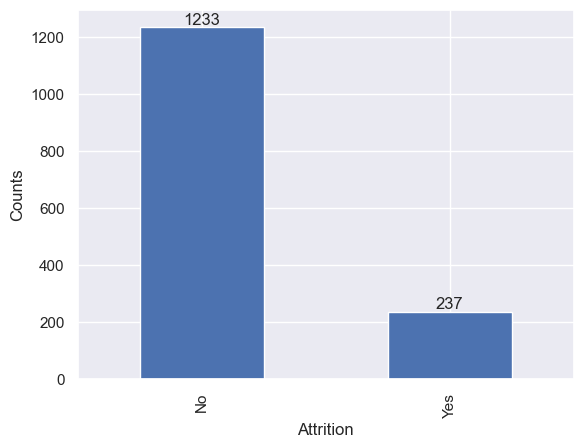

In [7]:
#Bar Chart for Count
attrition_count.plot(kind='bar')
plt.ylabel('Counts')

# Add count labels to each bar
for index, value in enumerate(attrition_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

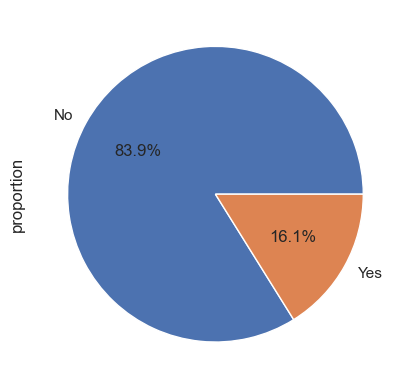

In [8]:
#Exited Proportion
attrition_prop = df['Attrition'].value_counts(normalize=True)*100
attrition_prop.plot(kind='pie',autopct='%.1f%%')
plt.show()

In [9]:
df.describe(include='all')

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
count,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470
unique,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,2,9,3,NaN,NaN,NaN,NaN,2,2
top,NaN,Travel_Rarely,NaN,NaN,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,Sales Executive,Married,NaN,NaN,NaN,NaN,No,No
freq,NaN,1043,NaN,NaN,NaN,961,NaN,NaN,606,NaN,882,326,673,NaN,NaN,NaN,NaN,1054,1233
mean,36.923810,NaN,6502.931293,2.728571,20479.501361,NaN,9.192517,2.912925,NaN,2.721769,NaN,NaN,NaN,3.153741,2.799320,7.008163,2.187755,NaN,NaN
std,9.135373,NaN,4707.956783,1.102846,15066.272964,NaN,8.106864,1.024165,NaN,1.093082,NaN,NaN,NaN,0.360824,1.289271,6.126525,3.222430,NaN,NaN
min,18.000000,NaN,1009.000000,1.000000,3027.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,30.000000,NaN,2911.000000,2.000000,9333.750000,NaN,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,3.000000,2.000000,3.000000,0.000000,NaN,NaN
50%,36.000000,NaN,4919.000000,3.000000,15484.500000,NaN,7.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,3.000000,5.000000,1.000000,NaN,NaN
75%,43.000000,NaN,8379.000000,4.000000,26103.750000,NaN,14.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,3.000000,9.000000,3.000000,NaN,NaN


In [10]:
# Select only the numerical variables
numerical_data = df.select_dtypes(include=['int64', 'float64'])

In [11]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                              Age  MonthlyIncome  JobSatisfaction     Bonus  \
Age                      1.000000       0.497855        -0.004892  0.489237   
MonthlyIncome            0.497855       1.000000        -0.007157  0.982030   
JobSatisfaction         -0.004892      -0.007157         1.000000 -0.003652   
Bonus                    0.489237       0.982030        -0.003652  1.000000   
DistanceFromHome        -0.001686      -0.017014        -0.003669 -0.011638   
Education                0.208034       0.094961        -0.011296  0.090648   
EnvSatisfaction          0.010146      -0.006259        -0.006784 -0.010143   
PerformanceRating        0.001904      -0.017120         0.002297  0.135163   
TrainingTimesLastYear   -0.019621      -0.021736        -0.005779 -0.023644   
YearsAtCompany           0.311309       0.514285        -0.003803  0.504654   
YearsSinceLastPromotion  0.216513       0.344978        -0.018214  0.341731   

                         DistanceFromHome  Educatio

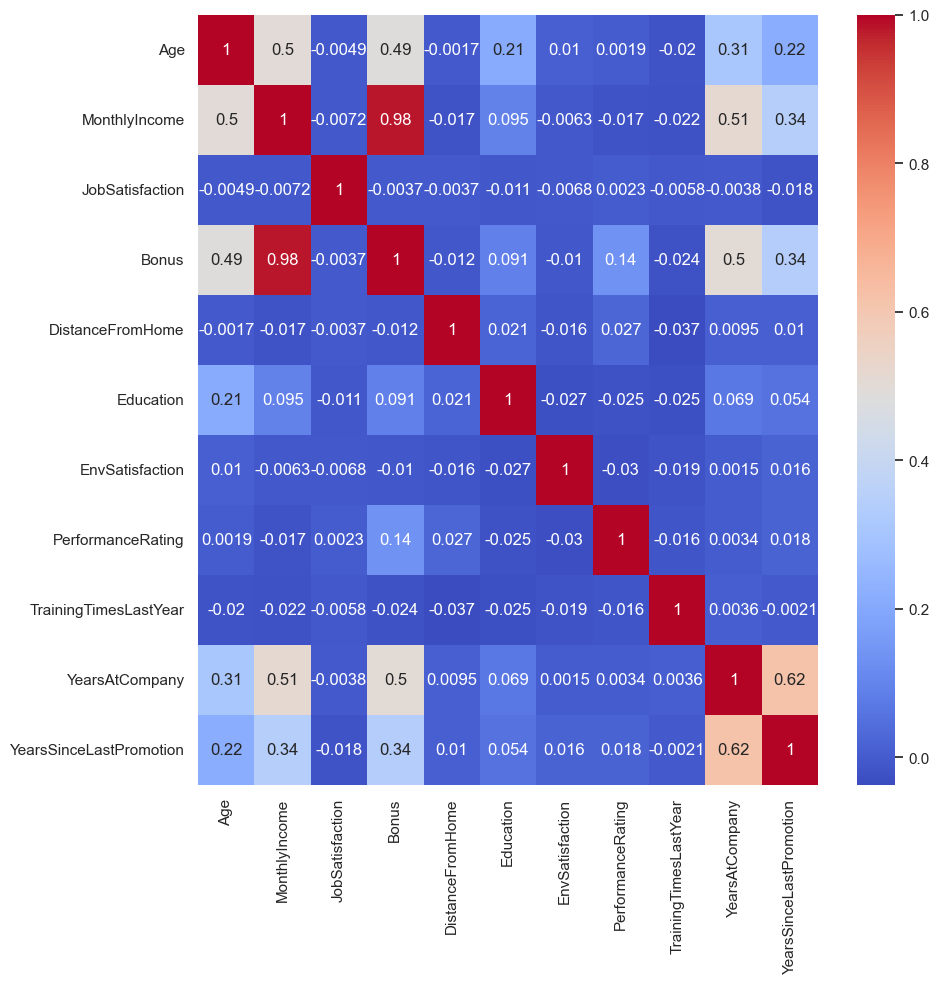

In [12]:
df_corr = correlation_matrix
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [13]:
#Compute the mean price of each class in view

# List of numerical variables
numerical_vars = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'Bonus', 'DistanceFromHome', 'Education', 
                  'EnvSatisfaction', 'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany', 
                  'YearsSinceLastPromotion']

meanAttrition_Age = df.groupby('Attrition',as_index=False)[numerical_vars].mean()
round(meanAttrition_Age,2)

,Attrition,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,Education,EnvSatisfaction,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
0,No,37.56,6832.74,2.78,21543.95,8.92,2.93,2.77,3.15,2.83,7.37,2.23
1,Yes,33.61,4787.09,2.47,14941.67,10.63,2.84,2.46,3.16,2.62,5.13,1.95


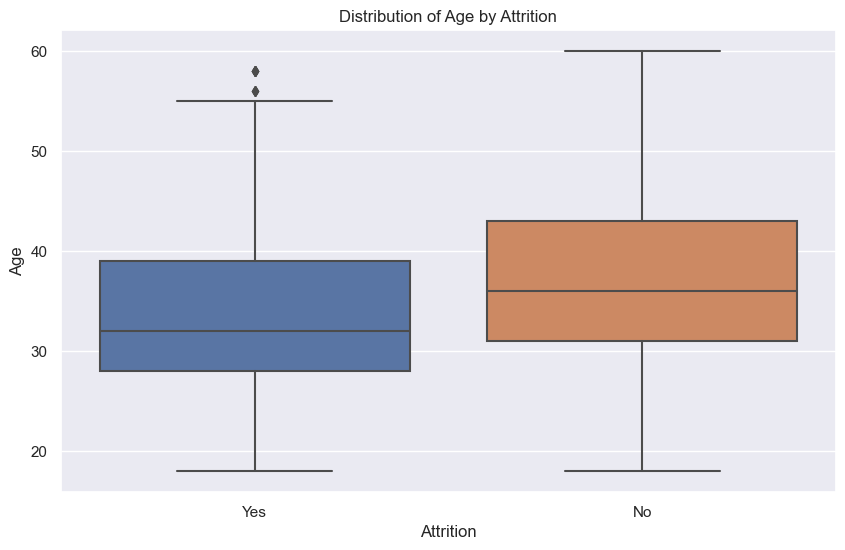

Mean Age by Attrition:
  Attrition    Age
0        No  37.56
1       Yes  33.61
Median Age by Attrition:
  Attrition   Age
0        No  36.0
1       Yes  32.0
Mode Age:
[35]
Quartiles:
0.25    30.0
0.50    36.0
0.75    43.0
Name: Age, dtype: float64
Point-Biserial Correlation Coefficient: -0.1592050068657792
P-value: 8.356308021103829e-10
There is a significant negative correlation between Age and Attrition.


In [14]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='Age')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Distribution of Age by Attrition')

# Show the plot
plt.show()

meanAttrition_Age = df.groupby('Attrition',as_index=False)['Age'].mean()
round(meanAttrition_Age,2)

stats.levene(df['Age'][df['Attrition']=='No'],
             df['Age'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean age for each attrition group
meanAttrition_Age = df.groupby('Attrition', as_index=False)['Age'].mean()
meanAttrition_Age = meanAttrition_Age.round(2)
print("Mean Age by Attrition:")
print(meanAttrition_Age)

# Calculate median age for each attrition group
medianAttrition_Age = df.groupby('Attrition', as_index=False)['Age'].median()
print("Median Age by Attrition:")
print(medianAttrition_Age)

# Calculate mode age for the entire dataset
modeAge = df['Age'].mode().values
print("Mode Age:")
print(modeAge)

# Calculate quartiles for the entire dataset
quartiles = df['Age'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['Age'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between Age and Attrition.")
    else:
        print("There is a significant negative correlation between Age and Attrition.")
else:
    print("There is no significant correlation between Age and Attrition.")

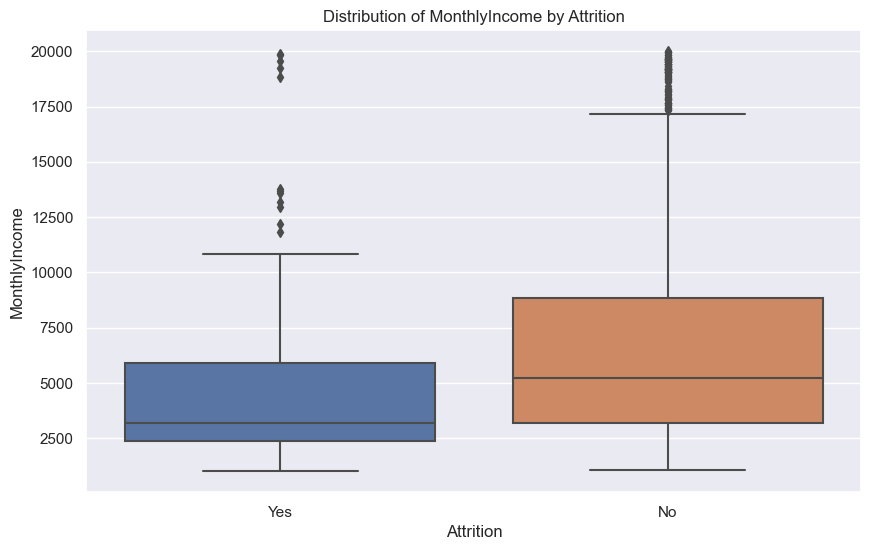

Mean MonthlyIncome by Attrition:
  Attrition  MonthlyIncome
0        No        6832.74
1       Yes        4787.09
Median MonthlyIncome by Attrition:
  Attrition  MonthlyIncome
0        No         5204.0
1       Yes         3202.0
Mode MonthlyIncome:
[2342]
Quartiles:
0.25    2911.0
0.50    4919.0
0.75    8379.0
Name: MonthlyIncome, dtype: float64
Point-Biserial Correlation Coefficient: -0.15983958238498833
P-value: 7.147363985354331e-10
There is a significant negative correlation between MonthlyIncome and Attrition.


In [15]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.title('Distribution of MonthlyIncome by Attrition')

# Show the plot
plt.show()

meanAttrition_MonthlyIncome = df.groupby('Attrition',as_index=False)['MonthlyIncome'].mean()
round(meanAttrition_MonthlyIncome,2)

stats.levene(df['MonthlyIncome'][df['Attrition']=='No'],
             df['MonthlyIncome'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean MonthlyIncome for each attrition group
meanAttrition_MonthlyIncome = df.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()
meanAttrition_MonthlyIncome = meanAttrition_MonthlyIncome.round(2)
print("Mean MonthlyIncome by Attrition:")
print(meanAttrition_MonthlyIncome)

# Calculate median MonthlyIncome for each attrition group
medianAttrition_MonthlyIncome = df.groupby('Attrition', as_index=False)['MonthlyIncome'].median()
print("Median MonthlyIncome by Attrition:")
print(medianAttrition_MonthlyIncome)

# Calculate mode MonthlyIncome for the entire dataset
modeMonthlyIncome = df['MonthlyIncome'].mode().values
print("Mode MonthlyIncome:")
print(modeMonthlyIncome)

# Calculate quartiles for the entire dataset
quartiles = df['MonthlyIncome'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['MonthlyIncome'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between MonthlyIncome and Attrition.")
    else:
        print("There is a significant negative correlation between MonthlyIncome and Attrition.")
else:
    print("There is no significant correlation between MonthlyIncome and Attrition.")


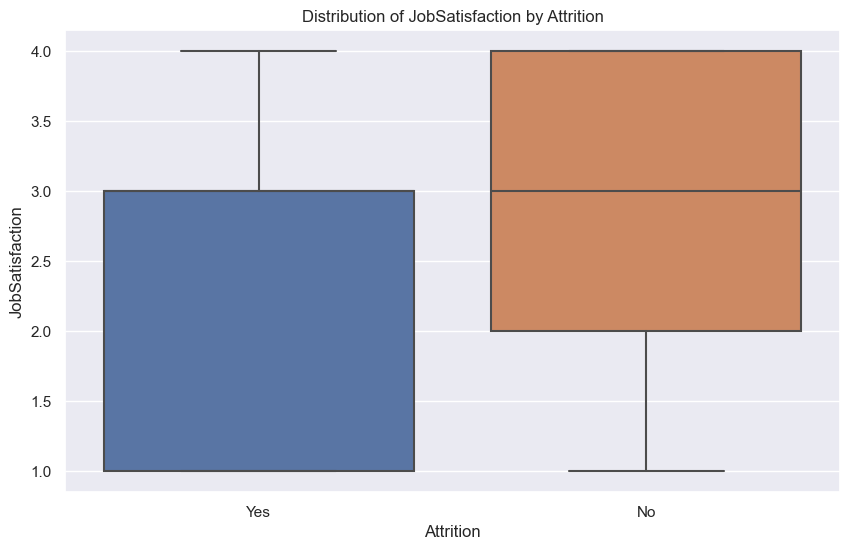

Mean JobSatisfaction by Attrition:
  Attrition  JobSatisfaction
0        No             2.78
1       Yes             2.47
Median JobSatisfaction by Attrition:
  Attrition  JobSatisfaction
0        No              3.0
1       Yes              3.0
Mode JobSatisfaction:
[4]
Quartiles:
0.25    2.0
0.50    3.0
0.75    4.0
Name: JobSatisfaction, dtype: float64
Point-Biserial Correlation Coefficient: -0.10348112606902117
P-value: 7.043066741731602e-05
There is a significant negative correlation between JobSatisfaction and Attrition.
Data set has outliers (values that are very high or very low and fall far outside the other values of the data set), the box and whiskers chart may not show the minimum or maximum value. Instead, the ends of the whiskers represent one and a half times the interquartile range (1.5*IQR)


In [16]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.title('Distribution of JobSatisfaction by Attrition')

# Show the plot
plt.show()

meanAttrition_JobSatisfaction = df.groupby('Attrition',as_index=False)['JobSatisfaction'].mean()
round(meanAttrition_JobSatisfaction,2)

stats.levene(df['JobSatisfaction'][df['Attrition']=='No'],
             df['JobSatisfaction'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean JobSatisfaction for each attrition group
meanAttrition_JobSatisfaction = df.groupby('Attrition', as_index=False)['JobSatisfaction'].mean()
meanAttrition_JobSatisfaction = meanAttrition_JobSatisfaction.round(2)
print("Mean JobSatisfaction by Attrition:")
print(meanAttrition_JobSatisfaction)

# Calculate median JobSatisfaction for each attrition group
medianAttrition_JobSatisfaction = df.groupby('Attrition', as_index=False)['JobSatisfaction'].median()
print("Median JobSatisfaction by Attrition:")
print(medianAttrition_JobSatisfaction)

# Calculate mode JobSatisfaction for the entire dataset
modeJobSatisfaction = df['JobSatisfaction'].mode().values
print("Mode JobSatisfaction:")
print(modeJobSatisfaction)

# Calculate quartiles for the entire dataset
quartiles = df['JobSatisfaction'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['JobSatisfaction'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between JobSatisfaction and Attrition.")
    else:
        print("There is a significant negative correlation between JobSatisfaction and Attrition.")
else:
    print("There is no significant correlation between JobSatisfaction and Attrition.")
print("Data set has outliers (values that are very high or very low and fall far outside the other values of the data set), the box and whiskers chart may not show the minimum or maximum value. Instead, the ends of the whiskers represent one and a half times the interquartile range (1.5*IQR)")

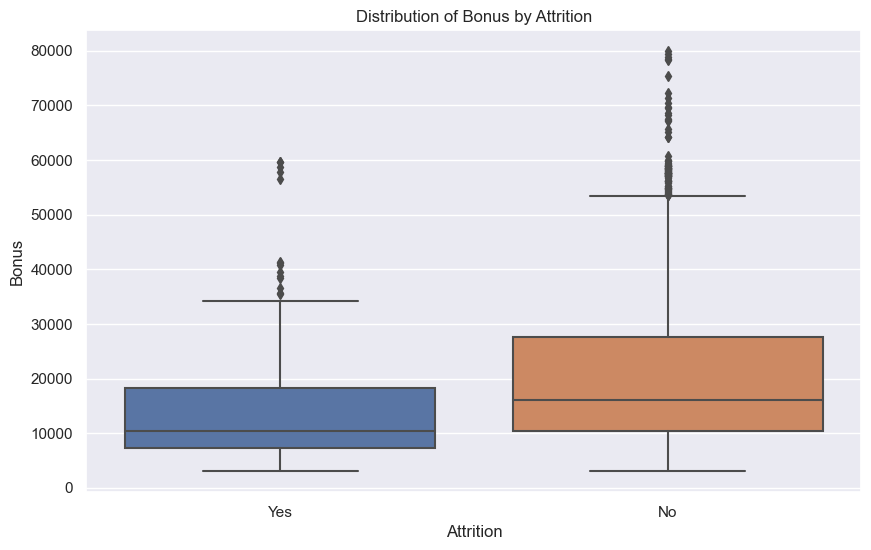

Mean Bonus by Attrition:
  Attrition     Bonus
0        No  21543.95
1       Yes  14941.67
Median Bonus by Attrition:
  Attrition    Bonus
0        No  16131.0
1       Yes  10392.0
Mode Bonus:
[ 7140  7353  7677  8223 16686 19041]
Quartiles:
0.25     9333.75
0.50    15484.50
0.75    26103.75
Name: Bonus, dtype: float64
Point-Biserial Correlation Coefficient: -0.16120353474752983
P-value: 5.097427592325118e-10
There is a significant negative correlation between Bonus and Attrition.


In [17]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='Bonus')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Bonus')
plt.title('Distribution of Bonus by Attrition')

# Show the plot
plt.show()

meanAttrition_Bonus = df.groupby('Attrition',as_index=False)['Bonus'].mean()
round(meanAttrition_Bonus,2)

stats.levene(df['Bonus'][df['Attrition']=='No'],
             df['Bonus'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean Bonus for each attrition group
meanAttrition_Bonus = df.groupby('Attrition', as_index=False)['Bonus'].mean()
meanAttrition_Bonus = meanAttrition_Bonus.round(2)
print("Mean Bonus by Attrition:")
print(meanAttrition_Bonus)

# Calculate median Bonus for each attrition group
medianAttrition_Bonus = df.groupby('Attrition', as_index=False)['Bonus'].median()
print("Median Bonus by Attrition:")
print(medianAttrition_Bonus)

# Calculate mode Bonus for the entire dataset
modeBonus = df['Bonus'].mode().values
print("Mode Bonus:")
print(modeBonus)

# Calculate quartiles for the entire dataset
quartiles = df['Bonus'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['Bonus'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between Bonus and Attrition.")
    else:
        print("There is a significant negative correlation between Bonus and Attrition.")
else:
    print("There is no significant correlation between Bonus and Attrition.")


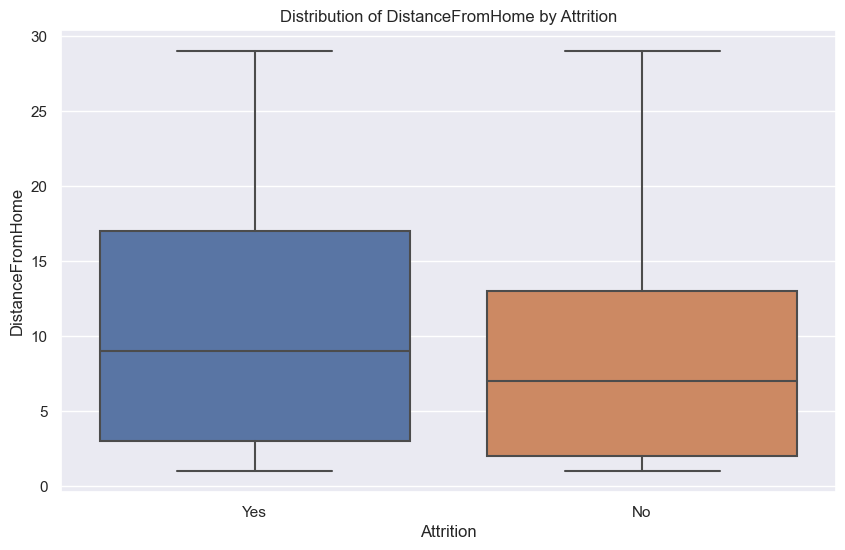

Mean DistanceFromHome by Attrition:
  Attrition  DistanceFromHome
0        No              8.92
1       Yes             10.63
Median DistanceFromHome by Attrition:
  Attrition  DistanceFromHome
0        No               7.0
1       Yes               9.0
Mode DistanceFromHome:
[2]
Quartiles:
0.25     2.0
0.50     7.0
0.75    14.0
Name: DistanceFromHome, dtype: float64
Point-Biserial Correlation Coefficient: 0.07792358295570358
P-value: 0.002793060080213459
There is a significant positive correlation between DistanceFromHome and Attrition.


In [18]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Distribution of DistanceFromHome by Attrition')

# Show the plot
plt.show()

meanAttrition_DistanceFromHome = df.groupby('Attrition',as_index=False)['DistanceFromHome'].mean()
round(meanAttrition_DistanceFromHome,2)

stats.levene(df['DistanceFromHome'][df['Attrition']=='No'],
             df['DistanceFromHome'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean DistanceFromHome for each attrition group
meanAttrition_DistanceFromHome = df.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
meanAttrition_DistanceFromHome = meanAttrition_DistanceFromHome.round(2)
print("Mean DistanceFromHome by Attrition:")
print(meanAttrition_DistanceFromHome)

# Calculate median DistanceFromHome for each attrition group
medianAttrition_DistanceFromHome = df.groupby('Attrition', as_index=False)['DistanceFromHome'].median()
print("Median DistanceFromHome by Attrition:")
print(medianAttrition_DistanceFromHome)

# Calculate mode DistanceFromHome for the entire dataset
modeDistanceFromHome = df['DistanceFromHome'].mode().values
print("Mode DistanceFromHome:")
print(modeDistanceFromHome)

# Calculate quartiles for the entire dataset
quartiles = df['DistanceFromHome'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['DistanceFromHome'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between DistanceFromHome and Attrition.")
    else:
        print("There is a significant negative correlation between DistanceFromHome and Attrition.")
else:
    print("There is no significant correlation between DistanceFromHome and Attrition.")


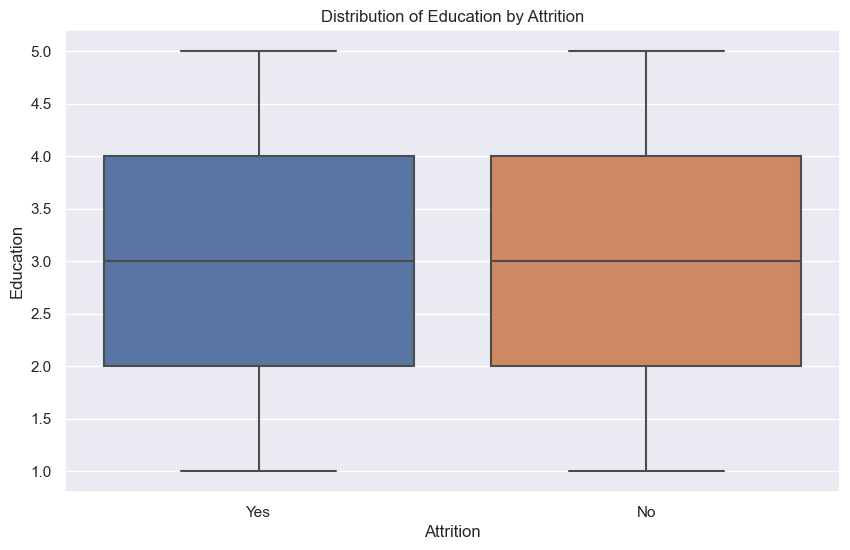

Mean Education by Attrition:
  Attrition  Education
0        No       2.93
1       Yes       2.84
Median Education by Attrition:
  Attrition  Education
0        No        3.0
1       Yes        3.0
Mode Education:
[3]
Quartiles:
0.25    2.0
0.50    3.0
0.75    4.0
Name: Education, dtype: float64
Point-Biserial Correlation Coefficient: -0.031372819640049183
P-value: 0.22931520332230626
There is no significant correlation between Education and Attrition.


In [19]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='Education')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.title('Distribution of Education by Attrition')

# Show the plot
plt.show()

meanAttrition_Education = df.groupby('Attrition',as_index=False)['Education'].mean()
round(meanAttrition_Education,2)

stats.levene(df['Education'][df['Attrition']=='No'],
             df['Education'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean Education for each attrition group
meanAttrition_Education = df.groupby('Attrition', as_index=False)['Education'].mean()
meanAttrition_Education = meanAttrition_Education.round(2)
print("Mean Education by Attrition:")
print(meanAttrition_Education)

# Calculate median Education for each attrition group
medianAttrition_Education = df.groupby('Attrition', as_index=False)['Education'].median()
print("Median Education by Attrition:")
print(medianAttrition_Education)

# Calculate mode Education for the entire dataset
modeEducation = df['Education'].mode().values
print("Mode Education:")
print(modeEducation)

# Calculate quartiles for the entire dataset
quartiles = df['Education'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['Education'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between Education and Attrition.")
    else:
        print("There is a significant negative correlation between Education and Attrition.")
else:
    print("There is no significant correlation between Education and Attrition.")


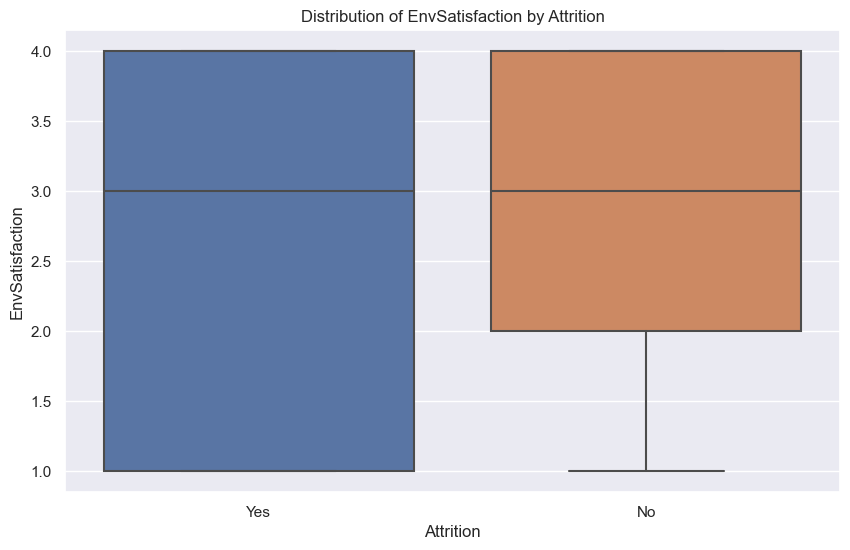

Mean EnvSatisfaction by Attrition:
  Attrition  EnvSatisfaction
0        No             2.77
1       Yes             2.46
Median EnvSatisfaction by Attrition:
  Attrition  EnvSatisfaction
0        No              3.0
1       Yes              3.0
Mode EnvSatisfaction:
[3]
Quartiles:
0.25    2.0
0.50    3.0
0.75    4.0
Name: EnvSatisfaction, dtype: float64
Point-Biserial Correlation Coefficient: -0.1033689783379354
P-value: 7.172338549369541e-05
There is a significant negative correlation between EnvSatisfaction and Attrition.


In [20]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='EnvSatisfaction')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('EnvSatisfaction')
plt.title('Distribution of EnvSatisfaction by Attrition')

# Show the plot
plt.show()

meanAttrition_EnvSatisfaction = df.groupby('Attrition',as_index=False)['EnvSatisfaction'].mean()
round(meanAttrition_EnvSatisfaction,2)

stats.levene(df['EnvSatisfaction'][df['Attrition']=='No'],
             df['EnvSatisfaction'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean EnvSatisfaction for each attrition group
meanAttrition_EnvSatisfaction = df.groupby('Attrition', as_index=False)['EnvSatisfaction'].mean()
meanAttrition_EnvSatisfaction = meanAttrition_EnvSatisfaction.round(2)
print("Mean EnvSatisfaction by Attrition:")
print(meanAttrition_EnvSatisfaction)

# Calculate median EnvSatisfaction for each attrition group
medianAttrition_EnvSatisfaction = df.groupby('Attrition', as_index=False)['EnvSatisfaction'].median()
print("Median EnvSatisfaction by Attrition:")
print(medianAttrition_EnvSatisfaction)

# Calculate mode EnvSatisfaction for the entire dataset
modeEnvSatisfaction = df['EnvSatisfaction'].mode().values
print("Mode EnvSatisfaction:")
print(modeEnvSatisfaction)

# Calculate quartiles for the entire dataset
quartiles = df['EnvSatisfaction'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['EnvSatisfaction'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between EnvSatisfaction and Attrition.")
    else:
        print("There is a significant negative correlation between EnvSatisfaction and Attrition.")
else:
    print("There is no significant correlation between EnvSatisfaction and Attrition.")


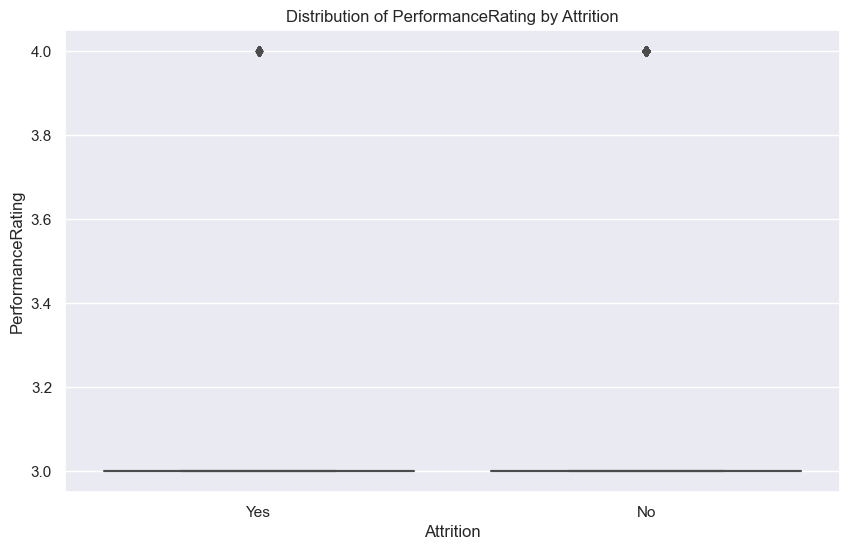

Mean PerformanceRating by Attrition:
  Attrition  PerformanceRating
0        No               3.15
1       Yes               3.16
Median PerformanceRating by Attrition:
  Attrition  PerformanceRating
0        No                3.0
1       Yes                3.0
Mode PerformanceRating:
[3]
Quartiles:
0.25    3.0
0.50    3.0
0.75    3.0
Name: PerformanceRating, dtype: float64
Point-Biserial Correlation Coefficient: 0.0028887517110807205
P-value: 0.9118840421068999
There is no significant correlation between PerformanceRating and Attrition.


In [21]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='PerformanceRating')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('PerformanceRating')
plt.title('Distribution of PerformanceRating by Attrition')

# Show the plot
plt.show()

meanAttrition_PerformanceRating = df.groupby('Attrition',as_index=False)['PerformanceRating'].mean()
round(meanAttrition_PerformanceRating,2)

stats.levene(df['PerformanceRating'][df['Attrition']=='No'],
             df['PerformanceRating'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean PerformanceRating for each attrition group
meanAttrition_PerformanceRating = df.groupby('Attrition', as_index=False)['PerformanceRating'].mean()
meanAttrition_PerformanceRating = meanAttrition_PerformanceRating.round(2)
print("Mean PerformanceRating by Attrition:")
print(meanAttrition_PerformanceRating)

# Calculate median PerformanceRating for each attrition group
medianAttrition_PerformanceRating = df.groupby('Attrition', as_index=False)['PerformanceRating'].median()
print("Median PerformanceRating by Attrition:")
print(medianAttrition_PerformanceRating)

# Calculate mode PerformanceRating for the entire dataset
modePerformanceRating = df['PerformanceRating'].mode().values
print("Mode PerformanceRating:")
print(modePerformanceRating)

# Calculate quartiles for the entire dataset
quartiles = df['PerformanceRating'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['PerformanceRating'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between PerformanceRating and Attrition.")
    else:
        print("There is a significant negative correlation between PerformanceRating and Attrition.")
else:
    print("There is no significant correlation between PerformanceRating and Attrition.")


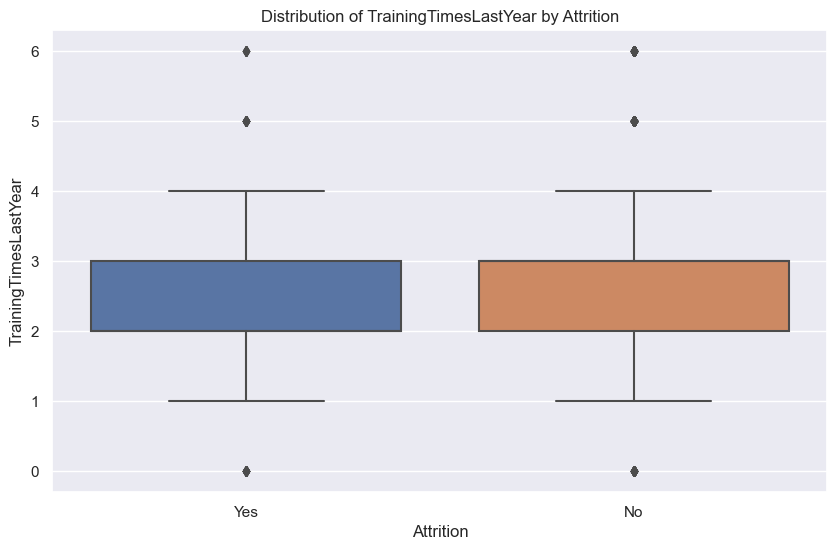

Mean TrainingTimesLastYear by Attrition:
  Attrition  TrainingTimesLastYear
0        No                   2.83
1       Yes                   2.62
Median TrainingTimesLastYear by Attrition:
  Attrition  TrainingTimesLastYear
0        No                    3.0
1       Yes                    2.0
Mode TrainingTimesLastYear:
[2]
Quartiles:
0.25    2.0
0.50    3.0
0.75    3.0
Name: TrainingTimesLastYear, dtype: float64
Point-Biserial Correlation Coefficient: -0.059477798556420394
P-value: 0.02257849973720211
There is a significant negative correlation between TrainingTimesLastYear and Attrition.


In [22]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='TrainingTimesLastYear')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('TrainingTimesLastYear')
plt.title('Distribution of TrainingTimesLastYear by Attrition')

# Show the plot
plt.show()

meanAttrition_TrainingTimesLastYear = df.groupby('Attrition',as_index=False)['TrainingTimesLastYear'].mean()
round(meanAttrition_TrainingTimesLastYear,2)

stats.levene(df['TrainingTimesLastYear'][df['Attrition']=='No'],
             df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean TrainingTimesLastYear for each attrition group
meanAttrition_TrainingTimesLastYear = df.groupby('Attrition', as_index=False)['TrainingTimesLastYear'].mean()
meanAttrition_TrainingTimesLastYear = meanAttrition_TrainingTimesLastYear.round(2)
print("Mean TrainingTimesLastYear by Attrition:")
print(meanAttrition_TrainingTimesLastYear)

# Calculate median TrainingTimesLastYear for each attrition group
medianAttrition_TrainingTimesLastYear = df.groupby('Attrition', as_index=False)['TrainingTimesLastYear'].median()
print("Median TrainingTimesLastYear by Attrition:")
print(medianAttrition_TrainingTimesLastYear)

# Calculate mode TrainingTimesLastYear for the entire dataset
modeTrainingTimesLastYear = df['TrainingTimesLastYear'].mode().values
print("Mode TrainingTimesLastYear:")
print(modeTrainingTimesLastYear)

# Calculate quartiles for the entire dataset
quartiles = df['TrainingTimesLastYear'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['TrainingTimesLastYear'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between TrainingTimesLastYear and Attrition.")
    else:
        print("There is a significant negative correlation between TrainingTimesLastYear and Attrition.")
else:
    print("There is no significant correlation between TrainingTimesLastYear and Attrition.")


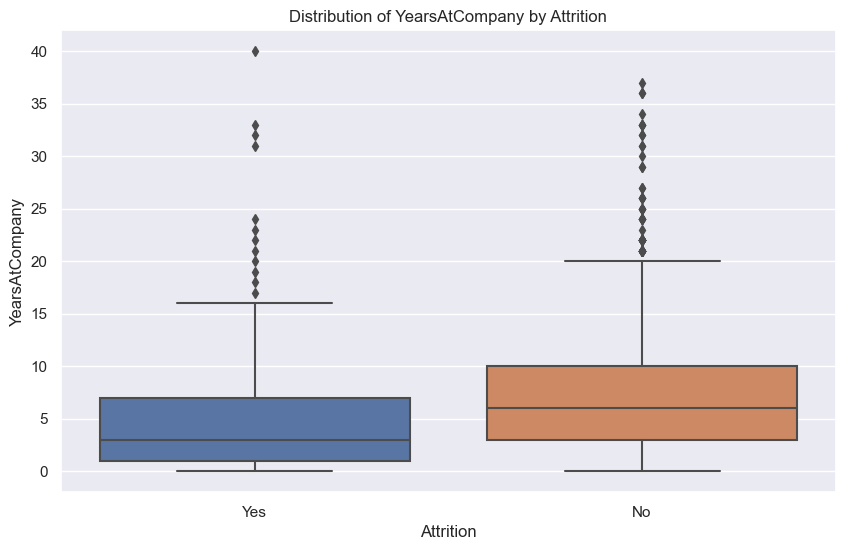

Mean YearsAtCompany by Attrition:
  Attrition  YearsAtCompany
0        No            7.37
1       Yes            5.13
Median YearsAtCompany by Attrition:
  Attrition  YearsAtCompany
0        No             6.0
1       Yes             3.0
Mode YearsAtCompany:
[5]
Quartiles:
0.25    3.0
0.50    5.0
0.75    9.0
Name: YearsAtCompany, dtype: float64
Point-Biserial Correlation Coefficient: -0.13439221398997694
P-value: 2.3188716103864222e-07
There is a significant negative correlation between YearsAtCompany and Attrition.


In [23]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.title('Distribution of YearsAtCompany by Attrition')

# Show the plot
plt.show()

meanAttrition_YearsAtCompany = df.groupby('Attrition',as_index=False)['YearsAtCompany'].mean()
round(meanAttrition_YearsAtCompany,2)

stats.levene(df['YearsAtCompany'][df['Attrition']=='No'],
             df['YearsAtCompany'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean YearsAtCompany for each attrition group
meanAttrition_YearsAtCompany = df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()
meanAttrition_YearsAtCompany = meanAttrition_YearsAtCompany.round(2)
print("Mean YearsAtCompany by Attrition:")
print(meanAttrition_YearsAtCompany)

# Calculate median YearsAtCompany for each attrition group
medianAttrition_YearsAtCompany = df.groupby('Attrition', as_index=False)['YearsAtCompany'].median()
print("Median YearsAtCompany by Attrition:")
print(medianAttrition_YearsAtCompany)

# Calculate mode YearsAtCompany for the entire dataset
modeYearsAtCompany = df['YearsAtCompany'].mode().values
print("Mode YearsAtCompany:")
print(modeYearsAtCompany)

# Calculate quartiles for the entire dataset
quartiles = df['YearsAtCompany'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['YearsAtCompany'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between YearsAtCompany and Attrition.")
    else:
        print("There is a significant negative correlation between YearsAtCompany and Attrition.")
else:
    print("There is no significant correlation between YearsAtCompany and Attrition.")


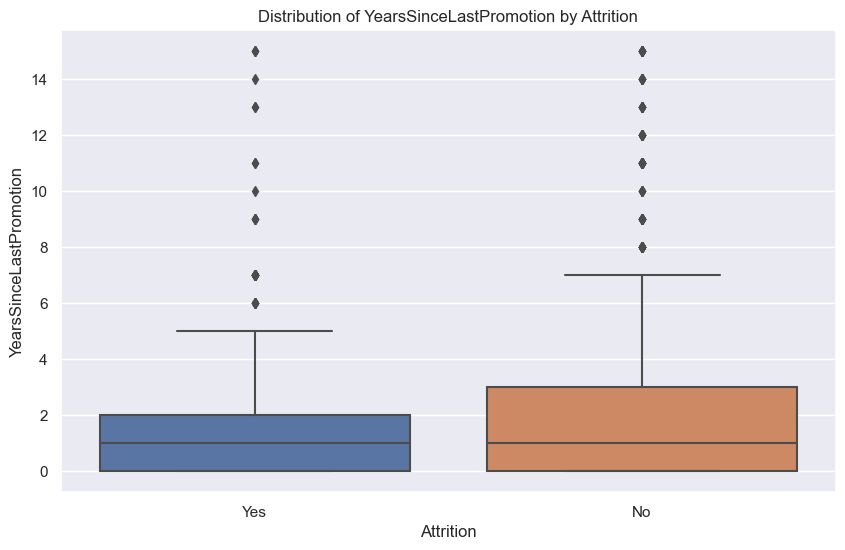

Mean YearsSinceLastPromotion by Attrition:
  Attrition  YearsSinceLastPromotion
0        No                     2.23
1       Yes                     1.95
Median YearsSinceLastPromotion by Attrition:
  Attrition  YearsSinceLastPromotion
0        No                      1.0
1       Yes                      1.0
Mode YearsSinceLastPromotion:
[0]
Quartiles:
0.25    0.0
0.50    1.0
0.75    3.0
Name: YearsSinceLastPromotion, dtype: float64
Point-Biserial Correlation Coefficient: -0.033018775142584326
P-value: 0.20578995916249357
There is no significant correlation between YearsSinceLastPromotion and Attrition.


In [24]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion')

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Distribution of YearsSinceLastPromotion by Attrition')

# Show the plot
plt.show()

meanAttrition_YearsSinceLastPromotion = df.groupby('Attrition',as_index=False)['YearsSinceLastPromotion'].mean()
round(meanAttrition_YearsSinceLastPromotion,2)

stats.levene(df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             center = 'mean'
            )

# Calculate and round the mean YearsSinceLastPromotion for each attrition group
meanAttrition_YearsSinceLastPromotion = df.groupby('Attrition', as_index=False)['YearsSinceLastPromotion'].mean()
meanAttrition_YearsSinceLastPromotion = meanAttrition_YearsSinceLastPromotion.round(2)
print("Mean YearsSinceLastPromotion by Attrition:")
print(meanAttrition_YearsSinceLastPromotion)

# Calculate median YearsSinceLastPromotion for each attrition group
medianAttrition_YearsSinceLastPromotion = df.groupby('Attrition', as_index=False)['YearsSinceLastPromotion'].median()
print("Median YearsSinceLastPromotion by Attrition:")
print(medianAttrition_YearsSinceLastPromotion)

# Calculate mode YearsSinceLastPromotion for the entire dataset
modeYearsSinceLastPromotion = df['YearsSinceLastPromotion'].mode().values
print("Mode YearsSinceLastPromotion:")
print(modeYearsSinceLastPromotion)

# Calculate quartiles for the entire dataset
quartiles = df['YearsSinceLastPromotion'].quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

# Convert 'Attrition' column to binary numeric values
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate the point-biserial correlation coefficient
pointbiserial_corr, p_value = stats.pointbiserialr(df['Attrition_numeric'], df['YearsSinceLastPromotion'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", pointbiserial_corr)
print("P-value:", p_value)

# Remove the temporary 'Attrition_numeric' column
df.drop(columns=['Attrition_numeric'], inplace=True)

# Interpret the correlation
if p_value < 0.05:
    if pointbiserial_corr > 0:
        print("There is a significant positive correlation between YearsSinceLastPromotion and Attrition.")
    else:
        print("There is a significant negative correlation between YearsSinceLastPromotion and Attrition.")
else:
    print("There is no significant correlation between YearsSinceLastPromotion and Attrition.")


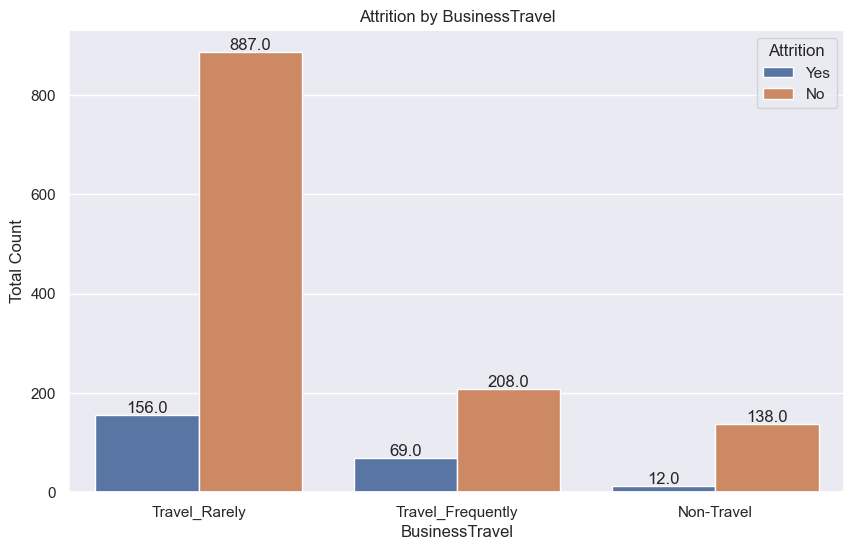

p-value: 5.608614476449931e-06
There is a significant association between BusinessTravel and Attrition.


In [25]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'BusinessTravel'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='BusinessTravel', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('BusinessTravel')
plt.ylabel('Total Count')
plt.title('Attrition by BusinessTravel')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between BusinessTravel and Attrition.")
else:
    print("There is no significant association between BusinessTravel and Attrition.")


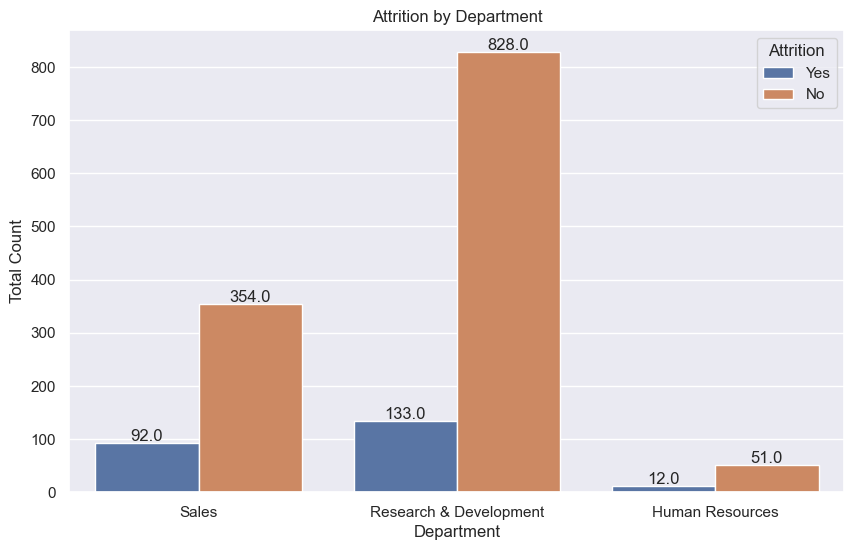

p-value: 0.004525606574479634
There is a significant association between Department and Attrition.


In [26]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['Department'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'Department'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Department', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Total Count')
plt.title('Attrition by Department')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between Department and Attrition.")
else:
    print("There is no significant association between Department and Attrition.")


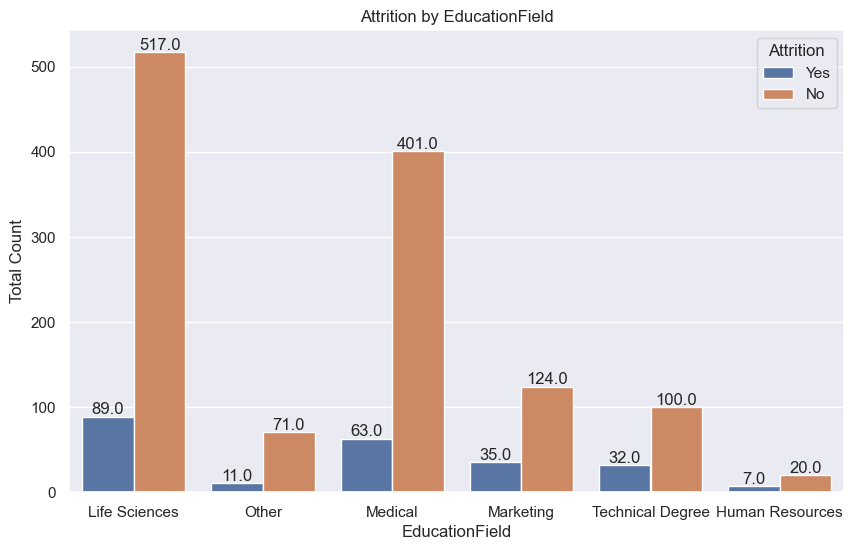

p-value: 0.006773980139025213
There is a significant association between EducationField and Attrition.


In [27]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['EducationField'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'EducationField'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='EducationField', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('EducationField')
plt.ylabel('Total Count')
plt.title('Attrition by EducationField')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between EducationField and Attrition.")
else:
    print("There is no significant association between EducationField and Attrition.")


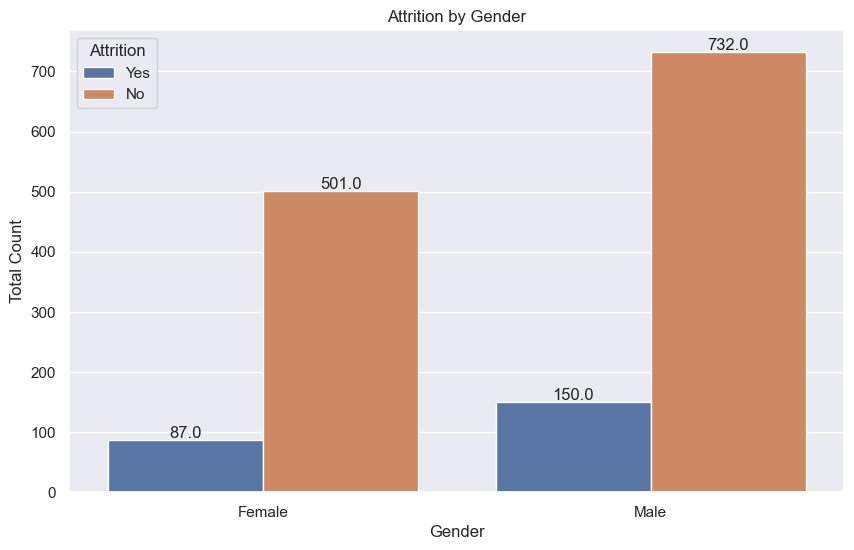

p-value: 0.29057244902890855
There is no significant association between Gender and Attrition.


In [28]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'Gender'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Attrition by Gender')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between Gender and Attrition.")
else:
    print("There is no significant association between Gender and Attrition.")


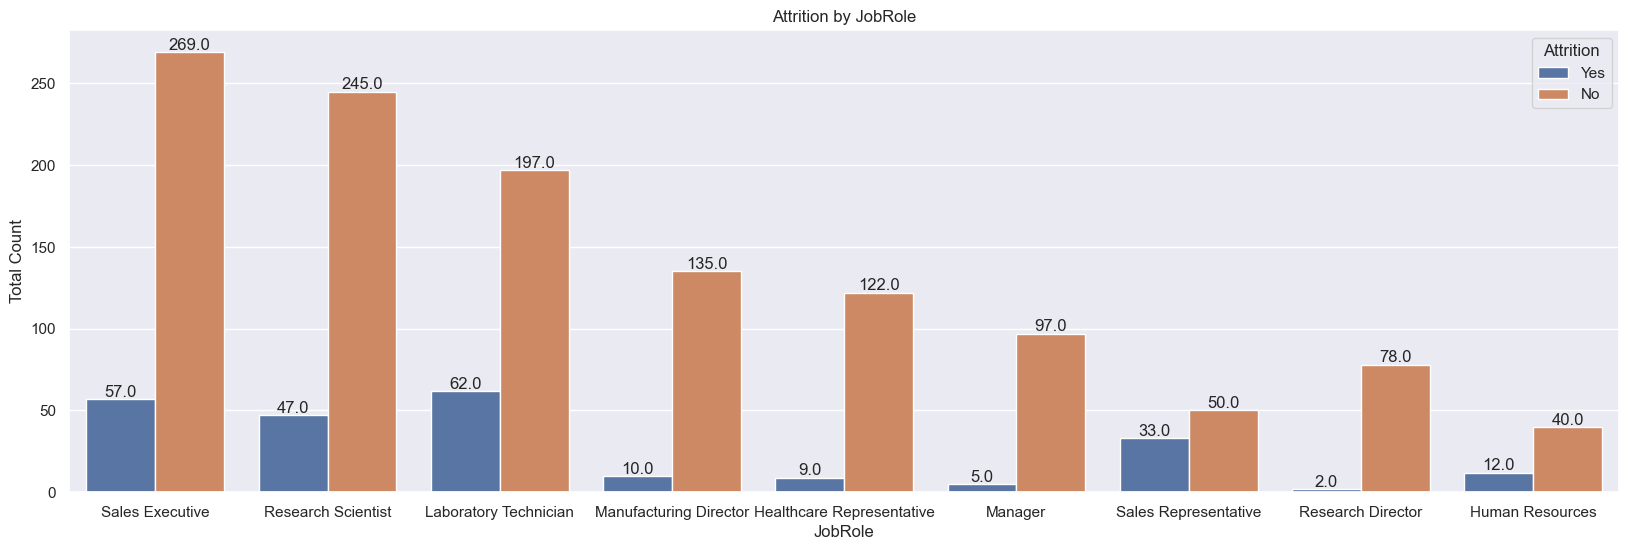

p-value: 2.7524816380506567e-15
There is a significant association between JobRole and Attrition.


In [29]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['JobRole'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'JobRole'
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='JobRole', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('JobRole')
plt.ylabel('Total Count')
plt.title('Attrition by JobRole')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between JobRole and Attrition.")
else:
    print("There is no significant association between JobRole and Attrition.")


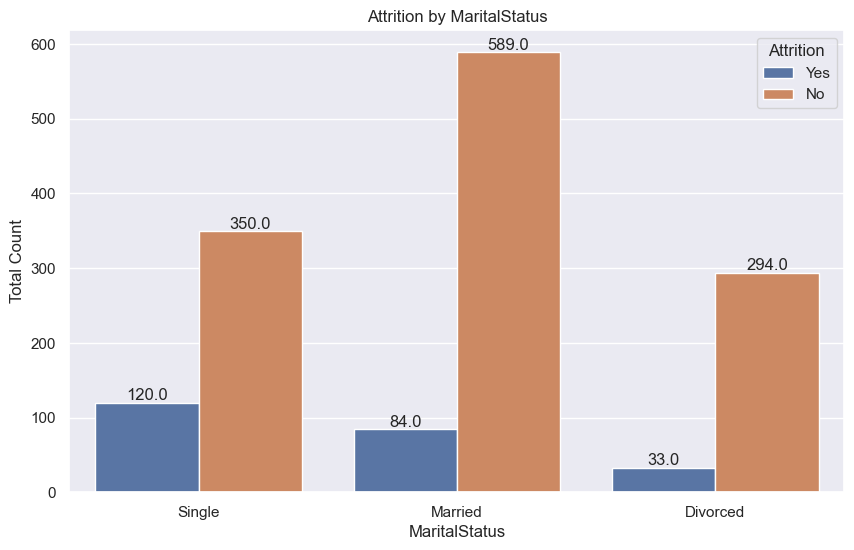

p-value: 9.455511060340833e-11
There is a significant association between MaritalStatus and Attrition.


In [30]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['MaritalStatus'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'MaritalStatus'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='MaritalStatus', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('MaritalStatus')
plt.ylabel('Total Count')
plt.title('Attrition by MaritalStatus')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between MaritalStatus and Attrition.")
else:
    print("There is no significant association between MaritalStatus and Attrition.")


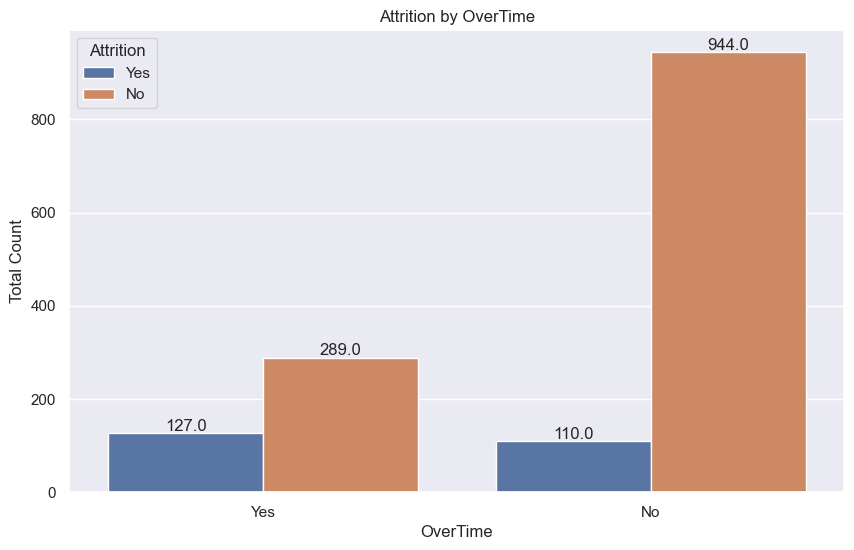

p-value: 8.158423721538322e-21
There is a significant association between OverTime and Attrition.


In [31]:
# Create a cross-tabulation of two categorical variables
cross_tab = pd.crosstab(df['OverTime'], df['Attrition'])

# Plot the total count of 'Yes' and 'No' attrition by 'OverTime'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='OverTime', hue='Attrition')

# Add total count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('OverTime')
plt.ylabel('Total Count')
plt.title('Attrition by OverTime')

# Show the plot
plt.show()

# Chi2 Test Correlation
c, p, dof, expected = stats.chi2_contingency(cross_tab)

print("p-value:", p)

# Interpret the chi-squared test
if p < 0.05:
    print("There is a significant association between OverTime and Attrition.")
else:
    print("There is no significant association between OverTime and Attrition.")

In [32]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [33]:
df = df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus', 
         'Department', 'DistanceFromHome', 'EducationField', 'EnvSatisfaction', 
         'JobRole', 'MaritalStatus', 'TrainingTimesLastYear', 'YearsAtCompany', 'OverTime',
         'Education', 'PerformanceRating', 'YearsSinceLastPromotion', 'Gender', 'Attrition']]

df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime,Education,PerformanceRating,YearsSinceLastPromotion,Gender,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes,2,3,0,Female,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No,1,4,1,Male,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes,2,3,0,Male,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes,4,3,3,Female,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No,1,3,2,Male,No


In [34]:
#General Slicing & Accessing Variable
x = df.iloc[:,:-5]
y = df.iloc[:,-1]

In [35]:
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [36]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

In [37]:
x_train.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
329,52,19068,3,57204,2,1,2,33,False,False,...,False,True,False,False,False,False,False,False,True,True
757,34,6142,3,18426,8,2,2,5,False,True,...,False,False,False,False,False,False,False,False,True,False
1319,52,8446,2,25338,5,2,2,8,False,True,...,False,False,False,False,False,True,False,False,True,True
1880,36,5673,3,17019,10,2,4,10,False,True,...,False,False,False,False,False,True,False,True,False,True
1783,22,2398,1,7194,8,3,6,1,False,True,...,True,False,False,False,False,False,False,True,False,True


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [39]:
x_train[1]

array([-0.32938399, -0.08356796,  0.27573851, -0.14140376, -0.15805206,
       -0.66255557, -0.61489389, -0.34311064, -0.48507125,  0.64168895,
        0.72613547, -0.65226877, -0.82899396, -0.34177349,  1.45013874,
       -0.2457942 , -0.3147466 , -0.19715288, -0.4676033 , -0.27912394,
       -0.32123121, -0.23791548, -0.50371752, -0.52486957, -0.2457942 ,
       -0.918292  ,  1.44171219, -0.63772923])

In [40]:
#Train Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
class_model = LogisticRegression(random_state=0)
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [41]:
x_test.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1256,49,18711,3,56133,4,1,2,1,False,True,...,False,True,False,False,False,False,False,True,False,False
844,27,12808,4,38424,5,3,3,9,False,True,...,False,False,False,True,False,False,False,False,False,True
927,41,2778,4,8334,2,2,1,7,False,True,...,True,False,False,False,False,False,False,False,False,True
1200,44,2936,3,8808,10,3,4,6,False,True,...,False,False,False,False,True,False,False,False,True,True
1497,29,8620,3,25860,19,3,3,10,False,True,...,False,False,False,False,False,True,False,False,False,False


In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train, y_train = smote.fit_resample(x_train,y_train)
x_train.shape

(1972, 28)

In [43]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test =  scaler.transform(x_test)

In [44]:
# Apply for Test Set
y_pred=class_model.predict(x_test)

In [45]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head()

,Actual,Predicted
EmployeeID,,
1256,No,No
844,No,No
927,Yes,No
1200,Yes,No
1497,No,No


In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming df_validate is already defined with 'Actual' and 'Predicted' columns

# Create a confusion matrix
conf_matrix = confusion_matrix(df_validate['Actual'], df_validate['Predicted'])

# Extract TP, FP, FN, TN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

# Print the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 6
False Positives (FP): 3
False Negatives (FN): 41
True Negatives (TN): 244


In [47]:
# Confusion Matrix
print(pd.crosstab(y_pred,y_test))

Attrition   No  Yes
row_0              
No         244   41
Yes          3    6


In [48]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       247
         Yes       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294



In [49]:
from sklearn.metrics import roc_curve, auc

In [50]:
#Find the predicted probabilities using the test set
probs = class_model.predict_proba(x_test)
preds = probs[:,1]

In [51]:
#Find the FPR, TPR and threshold
fpr, tpr, threshold = roc_curve(y_test,preds, pos_label='Yes')

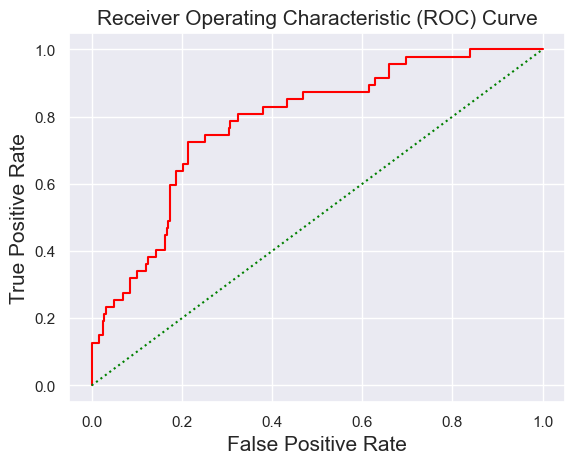

In [52]:
#Plotting the ROC
plt.plot(fpr,tpr, color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

In [53]:
#Calculate Area Under the Curver (AOC)
roc_auc = auc(fpr,tpr)
print (roc_auc.round(3))

0.783
